In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
filepath_1 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_effect.csv'
CRISPR_gene_effect = pd.read_csv(filepath_1)

filepath_2 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CRISPR_gene_dependency.csv'
CRISPR_gene_dependency = pd.read_csv(filepath_2)

filepath_3 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_expression.csv'
CCLE_expression = pd.read_csv(filepath_3)

filepath_4 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_mutations.csv'
CCLE_mutations = pd.read_csv(filepath_4)

filepath_5 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_gene_cn.csv'
CCLE_gene_cn = pd.read_csv(filepath_5)

filepath_6 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/CCLE_wes_gene_cn.csv'
CCLE_wes_gene_cn = pd.read_csv(filepath_6)

filepath_7 = '/Users/eliasrapkin-siles/Downloads/Machine Learning 1/Project/22Q2 Files/sample_info.csv'
sample_info = pd.read_csv(filepath_7)

/var/folders/qx/6y9gqv7j3391j3h9zc57b70m0000gn/T/ipykernel_95975/1637268288.py:11: DtypeWarning: Columns (3,19,22,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  CCLE_mutations = pd.read_csv(filepath_4)


In [6]:
sample_info = sample_info[['DepMap_ID', 'sex', 'sample_collection_site', 'primary_disease', 'Subtype', 'age', 'lineage', 'lineage_subtype',
                           'lineage_sub_subtype','Cellosaurus_NCIt_disease']]

primary_disease
Lung Cancer                   272
Leukemia                      137
Skin Cancer                   119
Lymphoma                      110
Brain Cancer                  106
Non-Cancerous                 103
Colon/Colorectal Cancer        85
Breast Cancer                  83
Head and Neck Cancer           79
Bone Cancer                    79
Ovarian Cancer                 73
Pancreatic Cancer              60
Kidney Cancer                  55
Gastric Cancer                 48
Neuroblastoma                  47
Sarcoma                        44
Endometrial/Uterine Cancer     40
Bladder Cancer                 39
Esophageal Cancer              38
Bile Duct Cancer               36
Myeloma                        35
Liver Cancer                   27
Cervical Cancer                24
Thyroid Cancer                 21
Rhabdoid                       20
Prostate Cancer                13
Unknown                        13
Eye Cancer                     11
Liposarcoma                    1

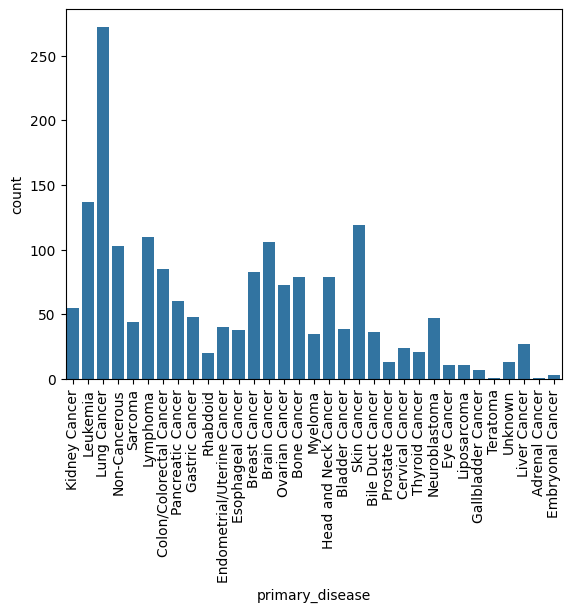

In [7]:
diseases = sample_info['primary_disease'].value_counts()
unique_values = sample_info['primary_disease'].unique()

display(sample_info['primary_disease'].value_counts())
sns.countplot(x="primary_disease", data=sample_info)
plt.xticks(rotation=90)
plt.show()

In [10]:
CRISPR_gene_effect_master_df = pd.merge(sample_info, CRISPR_gene_effect, on="DepMap_ID", how="outer")

predictive_genes = []

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_effect_master_df[CRISPR_gene_effect_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=True).index]
    data_by_mean = data_by_mean.iloc[:, :10]

    predictive_genes.extend(data_by_mean.columns)


print(pd.Series(predictive_genes).value_counts())

RAN (5901)          30
POLR2L (5441)       30
RPL15 (6138)        30
HSPE1 (3336)        28
RRM2 (6241)         26
RPL4 (6124)         25
RPS29 (6235)        22
SNRPB (6628)        22
RPS6 (6194)         18
CDC27 (996)         12
TXNL4A (10907)      12
UBL5 (59286)        12
PCNA (5111)          5
RPL23 (9349)         5
RRM1 (6240)          5
RPS19 (6223)         4
RPL31 (6160)         3
AACS (65985)         2
A1BG (1)             2
AAAS (8086)          2
A4GNT (51146)        2
A4GALT (53947)       2
A3GALT2 (127550)     2
A2ML1 (144568)       2
A2M (2)              2
A1CF (29974)         2
AADAC (13)           2
PRPF38A (84950)      2
RPS20 (6224)         2
RPS27A (6233)        2
SNRNP200 (23020)     2
RPL8 (6132)          2
SNRPA1 (6627)        2
RPS13 (6207)         1
NAPA (8775)          1
PLK1 (5347)          1
PRELID1 (27166)      1
SNRPD1 (6632)        1
PSMA6 (5687)         1
KIF11 (3832)         1
PSMB3 (5691)         1
SF3B5 (83443)        1
Name: count, dtype: int64


In [12]:
unpredictive_genes = []

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_effect_master_df[CRISPR_gene_effect_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    data_by_std = data_by_std.iloc[:, :10]

    unpredictive_genes.extend(data_by_mean.columns)


print(pd.Series(unpredictive_genes).value_counts())

A1BG (1)            33
A1CF (29974)        33
A2M (2)             33
A2ML1 (144568)      33
A3GALT2 (127550)    33
A4GALT (53947)      33
A4GNT (51146)       33
AAAS (8086)         33
AACS (65985)        33
AADAC (13)          33
Name: count, dtype: int64


In [13]:
CRISPR_gene_dependency_master_df = pd.merge(sample_info, CRISPR_gene_dependency, on="DepMap_ID", how="outer")

predictive_genes = []

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_dependency_master_df[CRISPR_gene_dependency_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=False).index]
    data_by_mean = data_by_mean.iloc[:, :10]

    predictive_genes.extend(data_by_mean.columns)


print(pd.Series(predictive_genes).value_counts())

RAN (5901)      23
RPL15 (6138)    21
RPS19 (6223)    13
RPL4 (6124)     13
RPS29 (6235)    13
                ..
CCT4 (10575)     1
EEF2 (1938)      1
PLK1 (5347)      1
RPS12 (6206)     1
NSF (4905)       1
Name: count, Length: 76, dtype: int64


In [15]:
unpredictive_genes = []

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CRISPR_gene_dependency_master_df[CRISPR_gene_dependency_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    data_by_std = data_by_std.iloc[:, :10]

    unpredictive_genes.extend(data_by_mean.columns)


print(pd.Series(unpredictive_genes).value_counts())

A1BG (1)            33
A1CF (29974)        33
A2M (2)             33
A2ML1 (144568)      33
A3GALT2 (127550)    33
A4GALT (53947)      33
A4GNT (51146)       33
AAAS (8086)         33
AACS (65985)        33
AADAC (13)          33
Name: count, dtype: int64


In [31]:
CCLE_expression_master_df = pd.merge(sample_info, CCLE_expression, on="DepMap_ID", how="outer")

predictive_genes = []

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_expression_master_df[CCLE_expression_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=False).index]
    data_by_mean = data_by_mean.iloc[:, :10]

    predictive_genes.extend(data_by_mean.columns)


print(pd.Series(predictive_genes).value_counts())

TMSB10 (9168)          33
RPS20 (6224)           33
RPL18 (6141)           33
YBX1 (4904)            33
COSMICID               31
WTSI_Master_Cell_ID    31
SLC25A5 (292)          27
HSPA5 (3309)           23
PSMA4 (5685)           21
VIM (7431)             15
PSMB1 (5689)           11
CD9 (928)               7
CD44 (960)              5
EIF4B (1975)            4
NDUFB4 (4710)           4
CYBA (1535)             2
CD99 (4267)             2
SARS1 (6301)            2
ITGA3 (3675)            1
CSDE1 (7812)            1
CD74 (972)              1
MDH1 (4190)             1
TNFRSF12A (51330)       1
STRAP (11171)           1
MGST1 (4257)            1
SEC62 (7095)            1
HMGB3 (3149)            1
M6PR (4074)             1
TFPI (7035)             1
COL11A1 (1301)          1
AK2 (204)               1
Name: count, dtype: int64


In [32]:
unpredictive_genes = []

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_expression_master_df[CCLE_expression_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    data_by_std = data_by_std.iloc[:, :10]

    unpredictive_genes.extend(data_by_mean.columns)


print(pd.Series(unpredictive_genes).value_counts())

COSMICID               33
WTSI_Master_Cell_ID    33
RPS20 (6224)           33
TMSB10 (9168)          33
RPL18 (6141)           33
SLC25A5 (292)          33
YBX1 (4904)            33
SARS1 (6301)           33
VIM (7431)             33
AK2 (204)              33
Name: count, dtype: int64


In [33]:
CCLE_mutations_master_df = pd.merge(sample_info, CCLE_mutations, on="DepMap_ID", how="outer")

predictive_genes = []

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_mutations_master_df[CCLE_mutations_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=False).index]
    data_by_mean = data_by_mean.iloc[:, :10]

    predictive_genes.extend(data_by_mean.columns)


print(pd.Series(predictive_genes).value_counts())

End_position           33
Start_position         33
COSMICID               33
Entrez_Gene_Id         33
WTSI_Master_Cell_ID    33
NCBI_Build             33
COSMIChsCnt            33
TCGAhsCnt              33
ExAC_AF                33
Name: count, dtype: int64


In [34]:
unpredictive_genes = []

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_mutations_master_df[CCLE_mutations_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    data_by_std = data_by_std.iloc[:, :10]

    unpredictive_genes.extend(data_by_mean.columns)


print(pd.Series(unpredictive_genes).value_counts())

End_position           33
Start_position         33
COSMICID               33
Entrez_Gene_Id         33
WTSI_Master_Cell_ID    33
NCBI_Build             33
TCGAhsCnt              33
COSMIChsCnt            33
ExAC_AF                33
Name: count, dtype: int64


In [38]:
CCLE_gene_cn_master_df = pd.merge(sample_info, CCLE_gene_cn, on="DepMap_ID", how="outer")

predictive_genes = []

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_gene_cn_master_df[CCLE_gene_cn_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=False).index]
    data_by_mean = data_by_mean.iloc[:, :10]

    predictive_genes.extend(data_by_mean.columns)


print(pd.Series(predictive_genes).value_counts())

COSMICID                  31
WTSI_Master_Cell_ID       31
BX284668.2 (112267871)    26
BX284668.5 (105376805)    26
RNU1-2 (26870)            26
                          ..
CDK11A (728642)            1
TYW3 (127253)              1
NFIA (4774)                1
AC099792.1 (101926964)     1
MIR4255 (100422898)        1
Name: count, Length: 111, dtype: int64


In [39]:
unpredictive_genes = []

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_gene_cn_master_df[CCLE_gene_cn_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    data_by_std = data_by_std.iloc[:, :10]

    unpredictive_genes.extend(data_by_mean.columns)


print(pd.Series(unpredictive_genes).value_counts())

COSMICID                  33
WTSI_Master_Cell_ID       33
BX284668.2 (112267871)    33
BX284668.5 (105376805)    33
RNU1-2 (26870)            33
CROCC (9696)              33
MIR6732 (102465438)       33
ZC3H12A (80149)           33
LINC01137 (728431)        33
MIR4255 (100422898)       33
Name: count, dtype: int64


In [42]:
CCLE_wes_gene_cn_master_df = pd.merge(sample_info, CCLE_wes_gene_cn, on="DepMap_ID", how="outer")

predictive_genes = []

# Filter and store DataFrames for each unique 'primary_disease'
for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_wes_gene_cn_master_df[CCLE_wes_gene_cn_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_mean = describe_df.loc[:, describe_df.loc['mean'].sort_values(ascending=False).index]
    data_by_mean = data_by_mean.iloc[:, :10]

    predictive_genes.extend(data_by_mean.columns)


print(pd.Series(predictive_genes).value_counts())

COSMICID               31
WTSI_Master_Cell_ID    31
AL137798.3 (nan)       17
AL137798.1 (nan)       17
CROCCP2 (84809)        14
                       ..
AL645728.2 (nan)        1
CR391992.1 (nan)        1
MED18 (54797)           1
SESN2 (83667)           1
AL591122.1 (nan)        1
Name: count, Length: 97, dtype: int64


In [43]:
unpredictive_genes = []

for value in unique_values:
    # Filter the master DataFrame based on 'primary_disease'
    filtered_df = CCLE_wes_gene_cn_master_df[CCLE_wes_gene_cn_master_df['primary_disease'] == value]
    describe_df = filtered_df.describe()
    
    data_by_std = describe_df.loc[:, describe_df.loc['std'].sort_values(ascending=False).index]    
    data_by_std = data_by_std.iloc[:, :10]

    unpredictive_genes.extend(data_by_mean.columns)


print(pd.Series(unpredictive_genes).value_counts())

COSMICID                  33
WTSI_Master_Cell_ID       33
BX284668.1 (nan)          33
BX284668.3 (nan)          33
MIR3675 (100500876)       33
BX284668.2 (112267871)    33
RNU1-5P (nan)             33
BX284668.5 (105376805)    33
BX284668.4 (nan)          33
RNU1-2 (26870)            33
Name: count, dtype: int64
